In [70]:
import sqlite3
import numpy
import matplotlib.pyplot as plt


import pandas as pd
import requests


In [71]:
nypd_df = pd.read_csv("/home/student/PythonDeveloper/pythonProject/Projekt_Pandas/data/nypd-motor-vehicle-collisions.csv")#, usecols=["name", "ingredients"]
nypd_df

,ACCIDENT DATE,ACCIDENT TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2019-08-05T00:00:00.000,16:30,QUEENS,11434.0,40.676052,-73.790184,"{'type': 'Point', 'coordinates': [-73.790184, ...",NaN,NaN,150-08 123 AVENUE,...,Unspecified,NaN,NaN,NaN,4184637.0,Sedan,Pick-up Truck,NaN,NaN,NaN
1,2019-08-27T00:00:00.000,16:02,BROOKLYN,11225.0,40.657780,-73.951096,"{'type': 'Point', 'coordinates': [-73.951096, ...",NaN,NaN,288 HAWTHORNE STREET,...,Unspecified,NaN,NaN,NaN,4195773.0,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2019-08-15T00:00:00.000,17:57,MANHATTAN,10002.0,40.718143,-73.993835,"{'type': 'Point', 'coordinates': [-73.993835, ...",CHRYSTIE STREET,GRAND STREET,NaN,...,NaN,NaN,NaN,NaN,4202457.0,Sedan,NaN,NaN,NaN,NaN
3,2019-08-30T00:00:00.000,21:53,BRONX,10460.0,40.840534,-73.866610,"{'type': 'Point', 'coordinates': [-73.86661, 4...",NaN,NaN,1837 EAST TREMONT AVENUE,...,Unspecified,NaN,NaN,NaN,4198749.0,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,2019-08-06T00:00:00.000,9:45,MANHATTAN,10016.0,40.745440,-73.975400,"{'type': 'Point', 'coordinates': [-73.9754, 40...",EAST 35 STREET,2 AVENUE,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4183798.0,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,2019-08-03T00:00:00.000,1:00,QUEENS,11411.0,40.700030,-73.745895,"{'type': 'Point', 'coordinates': [-73.745895, ...",115 AVENUE,208 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4181948.0,Sedan,Sedan,NaN,NaN,NaN
4962,2019-08-05T00:00:00.000,11:00,NaN,NaN,40.665142,-73.996690,"{'type': 'Point', 'coordinates': [-73.99669, 4...",19 STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4183412.0,Tractor Truck Diesel,Sedan,NaN,NaN,NaN
4963,2019-08-09T00:00:00.000,11:50,QUEENS,11379.0,40.721592,-73.876470,"{'type': 'Point', 'coordinates': [-73.87647, 4...",JUNIPER BOULEVARD NORTH,80 STREET,NaN,...,Following Too Closely,NaN,NaN,NaN,4185827.0,Sedan,Sedan,NaN,NaN,NaN
4964,2019-08-24T00:00:00.000,1:56,QUEENS,11420.0,40.671474,-73.815480,"{'type': 'Point', 'coordinates': [-73.81548, 4...",NaN,NaN,123-18 133 AVENUE,...,Unspecified,NaN,NaN,NaN,4196461.0,Convertible,NaN,NaN,NaN,NaN


Zmiana formatu daty

In [72]:
nypd_df['ACCIDENT DATE'] = pd.to_datetime(nypd_df['ACCIDENT DATE'], errors='coerce')
nypd_df

,ACCIDENT DATE,ACCIDENT TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2019-08-05,16:30,QUEENS,11434.0,40.676052,-73.790184,"{'type': 'Point', 'coordinates': [-73.790184, ...",NaN,NaN,150-08 123 AVENUE,...,Unspecified,NaN,NaN,NaN,4184637.0,Sedan,Pick-up Truck,NaN,NaN,NaN
1,2019-08-27,16:02,BROOKLYN,11225.0,40.657780,-73.951096,"{'type': 'Point', 'coordinates': [-73.951096, ...",NaN,NaN,288 HAWTHORNE STREET,...,Unspecified,NaN,NaN,NaN,4195773.0,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2019-08-15,17:57,MANHATTAN,10002.0,40.718143,-73.993835,"{'type': 'Point', 'coordinates': [-73.993835, ...",CHRYSTIE STREET,GRAND STREET,NaN,...,NaN,NaN,NaN,NaN,4202457.0,Sedan,NaN,NaN,NaN,NaN
3,2019-08-30,21:53,BRONX,10460.0,40.840534,-73.866610,"{'type': 'Point', 'coordinates': [-73.86661, 4...",NaN,NaN,1837 EAST TREMONT AVENUE,...,Unspecified,NaN,NaN,NaN,4198749.0,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,2019-08-06,9:45,MANHATTAN,10016.0,40.745440,-73.975400,"{'type': 'Point', 'coordinates': [-73.9754, 40...",EAST 35 STREET,2 AVENUE,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4183798.0,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,2019-08-03,1:00,QUEENS,11411.0,40.700030,-73.745895,"{'type': 'Point', 'coordinates': [-73.745895, ...",115 AVENUE,208 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4181948.0,Sedan,Sedan,NaN,NaN,NaN
4962,2019-08-05,11:00,NaN,NaN,40.665142,-73.996690,"{'type': 'Point', 'coordinates': [-73.99669, 4...",19 STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4183412.0,Tractor Truck Diesel,Sedan,NaN,NaN,NaN
4963,2019-08-09,11:50,QUEENS,11379.0,40.721592,-73.876470,"{'type': 'Point', 'coordinates': [-73.87647, 4...",JUNIPER BOULEVARD NORTH,80 STREET,NaN,...,Following Too Closely,NaN,NaN,NaN,4185827.0,Sedan,Sedan,NaN,NaN,NaN
4964,2019-08-24,1:56,QUEENS,11420.0,40.671474,-73.815480,"{'type': 'Point', 'coordinates': [-73.81548, 4...",NaN,NaN,123-18 133 AVENUE,...,Unspecified,NaN,NaN,NaN,4196461.0,Convertible,NaN,NaN,NaN,NaN


Zamiana daty na dni tygodnia

In [73]:
nypd_days=nypd_df['ACCIDENT DATE'].dt.day_name()
nypd_days

0          Monday
1         Tuesday
2        Thursday
3          Friday
4         Tuesday
          ...    
4961     Saturday
4962       Monday
4963       Friday
4964     Saturday
4965    Wednesday
Name: ACCIDENT DATE, Length: 4966, dtype: object

Zsumowanie ile razy występuje dany dzień tygodnia

In [74]:
nypd_numbers= nypd_days.value_counts()
nypd_numbers

ACCIDENT DATE
Friday       844
Saturday     739
Thursday     735
Wednesday    715
Monday       674
Tuesday      655
Sunday       604
Name: count, dtype: int64

Przekształcenie serii w df, nadanie indeksu

In [75]:
df_nypd_numbers = pd.DataFrame(nypd_numbers)
df_nypd_numbers=df_nypd_numbers.reset_index()
df_nypd_numbers


,ACCIDENT DATE,count
0,Friday,844
1,Saturday,739
2,Thursday,735
3,Wednesday,715
4,Monday,674
5,Tuesday,655
6,Sunday,604


nadanie nowych nazw dla kolumn

In [77]:
df_nypd_numbers = df_nypd_numbers.rename(columns={'ACCIDENT DATE': 'NAME DAY','count':'AMOUNT' })
df_nypd_numbers

,NAME DAY,AMOUNT
0,Friday,844
1,Saturday,739
2,Thursday,735
3,Wednesday,715
4,Monday,674
5,Tuesday,655
6,Sunday,604


In [ ]:
Utworzenie wykresu wraz z dokładnymi liczbami dni tygodni

[Text(0, 0, '844'),
 Text(0, 0, '739'),
 Text(0, 0, '735'),
 Text(0, 0, '715'),
 Text(0, 0, '674'),
 Text(0, 0, '655'),
 Text(0, 0, '604')]

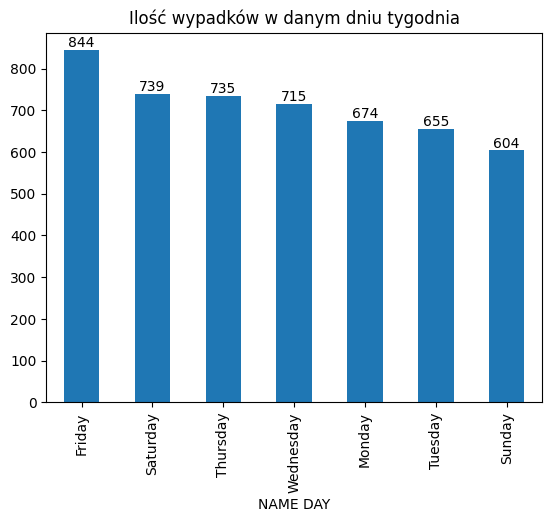

In [78]:
#create bar plot to visualize sales by product
df_nypd_numbers_bar = df_nypd_numbers.plot.bar(x='NAME DAY', y='AMOUNT',title='Ilość wypadków w danym dniu tygodnia', legend=False)

#annotate bars
df_nypd_numbers_bar.bar_label(ax.containers[0])